In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

# Generating Signal with Noise

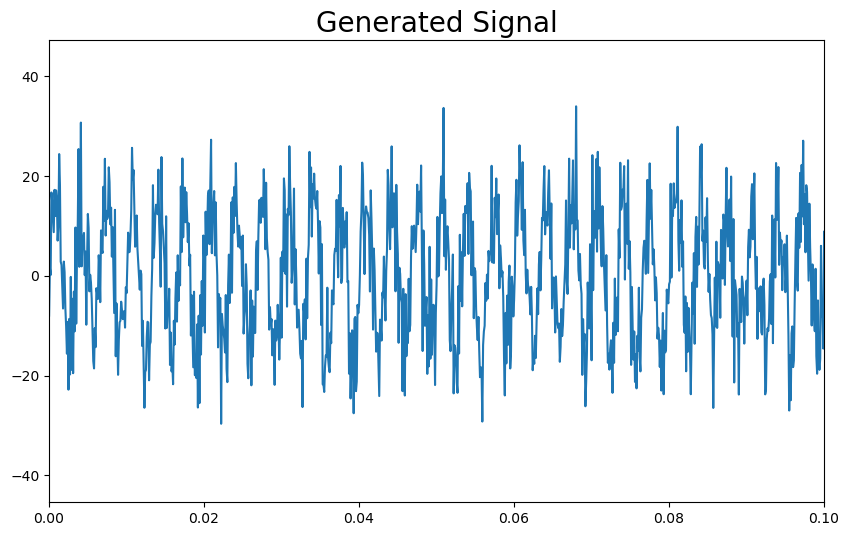

In [3]:
fs = 1e4 # Sampling rate
N = 1e5 # Number of Data Points
rms = 10 # RMS of sine wave
freq = 300.0   # frequency of sine wave
noise_P_den = 0.01  # noise power to add

noise_P = noise_P_den * fs / 2    # At sampling rate fs, our signal contains frequencies up to fs/2 and total noise power is density times frequency range

time = np.arange(N) / fs  # total signal time is num of points / sampling rate

x = rms*np.sqrt(2)*np.sin(2*np.pi*freq*time) # make sine wave
x += np.random.normal(scale=np.sqrt(noise_P), size=time.shape) # add noise

plt.figure(figsize=(10,6))

plt.plot(time,x)

plt.xlim([0,0.1])

plt.title('Generated Signal', fontsize=20)

plt.show()

# Computing and Plotting the Power Spectral Density

Max is at point number 246
Sum of PSD within rng points of peak is 3.645352812022913
Bin size is 1.220703125
Total power with rng points of peak is 4.4498935693639075
Original sine wave RMS^2 is 4
Average noise power density over the stated range is 0.010031597792770559


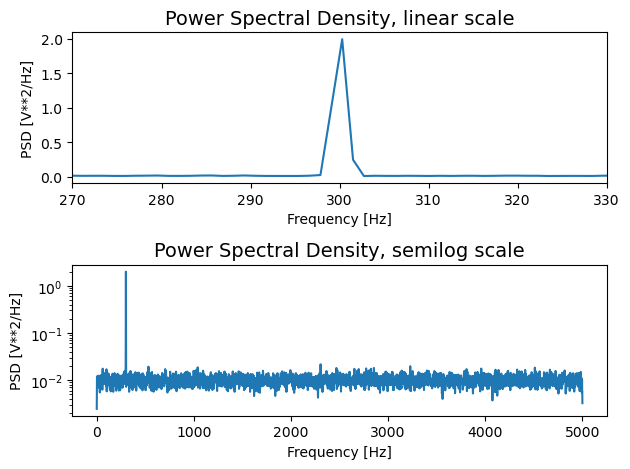

In [38]:
# Periodogram and Welch are two techniques for calculating power spectra, with advantages and disadvantages.
# It is easy to calculate an averaged power spectrum using Welch

#f, Pxx_den = signal.periodogram(x, fs, 'flattop', scaling='density')
f, Pxx_den = signal.welch(x, fs, nperseg=8*1024)

maxloc = np.argmax(Pxx_den)

print("Max is at point number",maxloc)

rng=20

peaksum = sum(Pxx_den[(maxloc-rng):(maxloc+rng)])

print("Sum of PSD within rng points of peak is",peaksum)

binsize = f[1]-f[0]

print("Bin size is",binsize)

sinepower = peaksum*binsize

print("Total power with rng points of peak is",sinepower)
print("Original sine wave RMS^2 is",(rms**2))

noisepowerden = np.average(Pxx_den[maxloc+100:maxloc+100000]) # Make sure this does not include elements beyond the length of Pxx_den

print("Average noise power density over the stated range is",noisepowerden)


fig, (ax1, ax2) = plt.subplots(2)

ax1.set_xlabel('Frequency [Hz]', fontsize=10)
ax1.set_ylabel('PSD [V**2/Hz]', fontsize=10)
ax1.set_title('Power Spectral Density, linear scale', fontsize=14)
ax2.set_xlabel('Frequency [Hz]', fontsize=10)
ax2.set_ylabel('PSD [V**2/Hz]', fontsize=10)
ax2.set_title('Power Spectral Density, semilog scale', fontsize=14)

ax1.plot(f, Pxx_den)
ax2.semilogy(f,Pxx_den)

ax1.set_xlim([freq-30,freq+30])

fig.tight_layout()





# Computing and Plotting the Power Spectrum

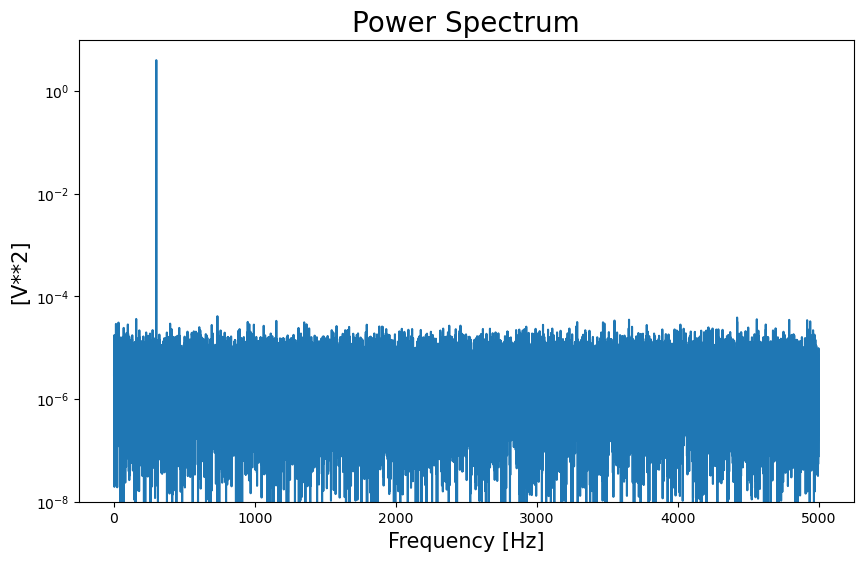

In [16]:
f, Pxx_spec = signal.periodogram(x, fs, 'flattop', scaling='spectrum')

plt.figure(figsize=(10,6))

plt.semilogy(f, Pxx_spec)

plt.ylim([1e-8, 1e1])

plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('[V**2]', fontsize=15)
plt.title('Power Spectrum', fontsize=20)

plt.show()

# Estimate of RMS Amplitude

In [32]:
print ("An estimate of the RMS amplitude is the peak height of the power spectrum, which is"
       ,np.sqrt(Pxx_spec.max()) ,"V")

An estimate of the RMS amplitude is the peak height of the power spectrum, which is 1.999381375831462 V
